## Load Data

In [1]:
import pandas as pd
dataset = pd.read_json(open('./Model_dataset/trainset.json').read())
dataset = dataset.reset_index(drop=True)

In [2]:
dataset.head(10)

,concanate_vec,date,label
0,None,19790301,NaN
1,"[-1.0600054013, -1.0680297129, -1.058958752000...",20071219,1.0
2,"[-1.0373279991, -1.0586098689, -1.0279081551, ...",20080206,0.0
3,"[-0.1567470266, -0.1734934159, -0.0772016772, ...",20090127,0.0
4,"[1.4359785707000001, 1.4407812482, 1.491689630...",20040811,0.0
5,"[0.1002469233, 0.0878306648, 0.0730863578, 0.1...",20060428,0.0
6,"[0.0855026163, 0.09791887490000001, 0.15612008...",20060512,0.0
7,"[-0.0200355813, -0.091429068, -0.0728046802, 0...",20060530,0.0
8,"[0.0730863578, 0.1460318767, 0.0738623739, 0.1...",20060602,0.0
9,"[0.17164041, 0.1266314728, 0.0567900184, -0.00...",20060725,0.0


## Delete instances where concanate_vec is not a list

In [3]:
num_instances=dataset.shape[0]
result=[]
drop_list=[]
for index in range(num_instances):
    if (type(dataset["concanate_vec"][index])!=list):
        drop_list.append(index )
dataset=dataset.drop(drop_list)
dataset = dataset.reset_index(drop=True)

In [4]:
result=[]
counter=0
num_instances=dataset.shape[0]
for index in range(num_instances):
    result.append(dataset["concanate_vec"][index])

In [5]:
flat_list = [item for sublist in result for item in sublist]

In [6]:
import numpy as np
array_result=np.array(flat_list).reshape(18898, 330)

In [7]:
X=pd.DataFrame(array_result)

In [8]:
y=dataset["label"]

In [9]:
df_concated=pd.concat([X, y], axis=1, ignore_index=True)

In [10]:
from sklearn.svm import SVC
clf=SVC()

In [11]:
X.head(10)

,0,1,2,3,4,5,6,7,8,9,...,320,321,322,323,324,325,326,327,328,329
0,-1.06001,-1.06803,-1.05896,-1.01291,-1.00523,-1.01535,-1.04954,-1.05966,-1.0764,-1.07187,...,0.0117761,0.0231854,-0.0955195,0.00328217,0.0742292,-0.0353203,0.0500222,0.081045,0.0923203,0.0282475
1,-1.03733,-1.05861,-1.02791,-0.993718,-0.979762,-1.04186,-1.05407,-1.0614,-1.08896,-1.08792,...,0.00715307,0.0783223,-0.140327,0.020263,0.121062,0.0156239,0.0392349,0.019112,-0.0530842,-0.0786969
2,-0.156747,-0.173493,-0.0772017,-0.0716195,0.109102,0.215511,0.243073,0.309012,0.227373,0.295754,...,0.0071759,0.0253402,-0.11671,-0.107395,-0.0173618,-0.0779916,0.0577917,-0.0649507,0.111301,-0.0501828
3,1.43598,1.44078,1.49169,1.4744,1.45711,1.41677,1.4062,1.45039,1.45711,1.46479,...,-0.0319854,0.0810131,-0.100869,-0.0154728,0.0432115,-0.00685893,0.0404974,0.0571148,0.0160453,-0.0166533
4,0.100247,0.0878307,0.0730864,0.109559,0.105679,0.0963668,0.0226453,0.0304055,0.0529099,0.0878307,...,0.000621857,0.0309769,-0.0957508,-0.0818827,0.0483043,0.00639102,0.065712,0.00459763,0.0975757,-0.0178957
5,0.0855026,0.0979189,0.15612,0.108783,0.101023,0.0730864,0.0412697,0.00402092,0.00945303,-0.00761932,...,-0.0398286,0.0799209,-0.0916625,-0.0289409,0.0768208,-0.02055,0.060055,0.0261428,-0.00774097,-0.0994857
6,-0.0200356,-0.0914291,-0.0728047,0.0730864,0.146032,0.0738624,0.150688,0.205785,0.176297,0.252346,...,-0.0588397,0.07023,-0.108563,-0.0435956,0.126288,-0.0381047,0.0183672,0.0291315,0.0204608,-0.0315321
7,0.0730864,0.146032,0.0738624,0.150688,0.205785,0.176297,0.252346,0.173968,0.268642,0.177849,...,-0.0465849,0.0462824,-0.111148,-0.0424118,0.111457,0.0306361,0.0971678,0.0864718,0.0846592,-0.078386
8,0.17164,0.126631,0.05679,-0.00218721,0.0273014,0.053686,0.0668782,0.054462,0.0187652,0.00246889,...,0.00700727,0.0761371,-0.00386824,0.0107615,0.05686,0.069796,0.044813,-0.0189239,-0.0181145,0.0260923
9,0.126631,0.05679,-0.00218721,0.0273014,0.053686,0.0668782,0.054462,0.0187652,0.00246889,-0.039436,...,0.0340708,0.0671058,-0.0217082,-0.0695547,0.0261832,0.00381007,0.0554926,-0.00324145,-0.0109841,0.0629922


In [12]:
df_concated=df_concated.apply(lambda x: pd.to_numeric(x, errors="coerce"))
#pd.to_numeric(X.iloc[:, 0], errors="coerce")

In [13]:
df_concated=df_concated.dropna()

### Modeling

In [15]:
from sklearn.model_selection import train_test_split 
X=df_concated.iloc[:, 0:330]
y=df_concated.iloc[:, 330]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [97]:
clf=SVC(probability=True)
clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [123]:
len(X_test)

1870

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### ROC Figure Ploting

In [20]:
from sklearn.metrics import roc_curve, auc
y_predict=clf.predict_proba(X_test)
fpr, tpr, _=roc_curve(y_test.ravel(), y_predict[:, 1].ravel())
roc_auc = auc(fpr, tpr)

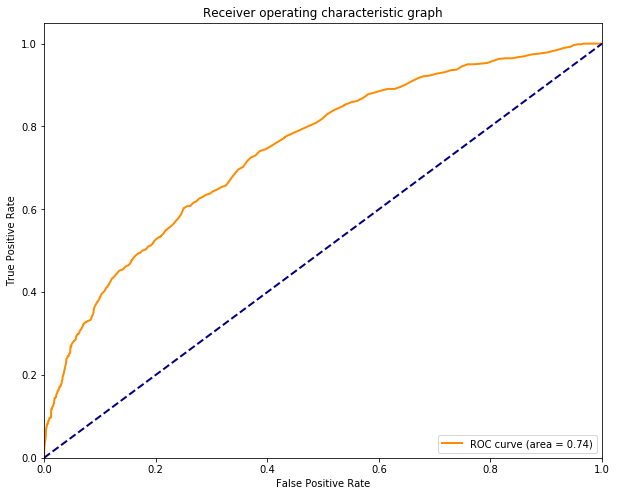

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic graph')
plt.legend(loc="lower right")
plt.show()